## 여러 분류 모델 성능 평가 지표를 활용한 모델 평가

### 피마 인디언 당뇨병 예측
- 피마 인디언 당뇨병 (Pima Indian Diabetes) 데이터 세트를 이용해  
- 당뇨병 여부를 판단하는 머신러닝 예측 모델을 수립하고  
- 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 평가 지표 적용  

### 피마 인디언 당뇨병 예측 모델  
- 사용 데이터 세트 : Pima Indian Diabetes  
- 데이터 세트 분리 : 테스트용(평가용) 데이터 세트 20%  
- 사용하는 ML 알고리즘 : 로지스틱 회귀 알고리즘  
- 모델 평가 : 예측 성능 평가   
    - 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 평가 지표 

#### 피마 인디언 당뇨명 데이터 세트  
- 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터  
- 보통 당뇨 원인으로 식습관과 유전을 꼽음  
- 피마 지역은 고립된 지역에서 인디언 고유의 활동이 지속돼 왔지만  
- 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자 발생  
- 고립된 유전적 특성 때문에 당뇨학회에서는 피마 인디언의 당뇨병 자료에 대해 많은 연구 수행  

https://www.kaggle.com/  
회원가입하고 데이터 다운로드  


###  피마 인디언 당뇨병 예측 프로세스
(1) 데이터 세트 준비 : 피마 인디언 당뇨명 데이터 세트  
(2) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트  
(3) 모델 학습 및 예측 수행 :  로지스틱 회귀 알고리즘 적용하여 모델 학습 및 예측   
(4) 평가 : 예측 성능 평가 지표 출력   
(5) 재현율 성능에 조금 더 초점을 맞춰 조정  
(6) 예측 성능을 향상시키기 위해 데이터 가공 수행  
(7) 다시 예측 성능 평가  

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### (1) 데이터 세트 준비 : 피마 인디언 당뇨명 데이터 세트

In [8]:
diabetes_data = pd.read_csv('../../data/diabetes.csv')
diabetes_data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


피마 인디언 당뇨병 데이터 세트 피처
* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)

In [6]:
# 레이블 데이터 확인 : 'Outcome'
# (클래스 결정값 (정답) : 0, 1)
diabetes_data['Outcome'].value_counts()

# 전체 768개 중에서
# 0 Negative 값이 500개
# 1 Positive 값이 268개

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# 피처 데이터
feature_data = diabetes_data.drop('Outcome', axis=1)
feature_data.head(2)

# 레이블 데이터
labels = diabetes_data['Outcome']

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


### (2) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트

In [13]:
from sklearn.model_selection import train_test_split

# 학습/테스트 데이터 세트 분리
# 테스트 데이터 세트 : 20%

# stratify=레이블데이터 옵션 없는 경우
X_train, X_test, y_train, y_test = train_test_split(feature_data,
                                                    labels,
                                                    test_size=0.2, 
                                                    random_state=11)

In [14]:
#stratify=레이블데이터 옵션 없는 경우
X_train, X_test, y_train, y_test = train_test_split(feature_data,
                                                    labels,
                                                    test_size=0.2, 
                                                    random_state=11,
                                                    stratify=labels)

In [15]:
# 데이터 세트 분리하기 전과 후의 레이블값
# 분리 전
labels.value_counts(normalize=True)

# 분리 후
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64

#### stratify=y 옵션
- y : 레이블 데이터
- 레이블 값에서 0과 1의 비율을 유지하면서 데이터 세트 분리

피마 인디언 당뇨병 데이터 세트    
- 전체 768개 중에서 1이 268개 : 34.89 %   
     
- stratify=y로 설정한 경우 (1의 비율 거의 유사)  
    - 학습 데이터 세트 에서 1의 비율 : 34.85 %  
    - 테스트 데이터 세트에서 1의 비율 : 35.06%  
         
- stratify=y로 설정하지 않은 경우 (1의 비율 차이가 있음)  
    - 학습 데이터 세트 에서 1의 비율 : 34.36 %  
    - 테스트 데이터 세트에서 1의 비율 : 37.01 %  

### (3) 모델 학습 및 예측 수행 
- 로지스틱 회귀 알고리즘 적용하여 모델 학습 및 예측 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 모델 생성
lr_clf = LogisticRegression(max_iter=1000)

# 모델 학습 및 예측
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

LogisticRegression(max_iter=1000)

LogisticRegression 정확도 : 0.7792


In [20]:
y_pred
y_pred.size

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

154

### (4) 평가 : 예측 성능 평가 지표 출력 
- 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 평가 지표

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 


# 예측 모델 평가 수행 및 평가 지표 출력하는 함수  작성
def get_clf_eval(y_test, y_pred, pred_proba) :
    cm = confusion_matrix(y_test, y_pred) # 혼동행렬(오차행렬)
    accuracy = accuracy_score(y_test, y_pred) # 정확도
    precision = precision_score(y_test, y_pred) # 정밀도
    recall = recall_score(y_test, y_pred)# 재현율
    f1 = f1_score(y_test, y_pred) # F1 스코어
    roc_auc = roc_auc_score(y_test, pred_proba) # ROC_AUC 스코어
    
    # 출력 
    # 오차행렬
    print("오차행렬 : ", cm)
    # 정확도, 정밀도, 재현율, F1
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f},  재현율: {recall:.4f}, F1 Score: {f1:.4f}, ROC_AUC : {roc_auc:.4f}")

In [23]:
# 함수 호출해서 예측 모델 평가 및 평가 지표 출력 

# 레이블 값이 1일 때의 예측 확률
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred, pred_proba)

# 결과
# 에측 정확도가 약 78%, 재현율이 약 56%
# 데이터가 당뇨병 환자 예측으로 재현율에 더 초점을 맞춰 조정을 해야 함

오차행렬 :  [[90 10]
 [24 30]]
정확도: 0.7792, 정밀도: 0.7500,  재현율: 0.5556, F1 Score: 0.6383, ROC_AUC : 0.8513


In [24]:
# 예측 확률값 확인
lr_clf.predict_proba(X_test)[:5]

array([[0.00933261, 0.99066739],
       [0.82503103, 0.17496897],
       [0.21050862, 0.78949138],
       [0.22381432, 0.77618568],
       [0.88601681, 0.11398319]])

### (5) 재현율 성능에 조금 더 초점을 맞춰 조정

In [ ]:
# 먼저 정밀도와 재현율 곡선을 확인하고
# 임계값 별로 정밀도와 재현율 값의 변화 확인

In [25]:
# precision_recall_curve() 사용해서 
from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
thresholds.size
precision.size # 재현율
recalls.size # 정밀도

154

155

155

In [26]:
# 그래프
# x축은 thresholds 값, y축은 정밀도, 재현율 값으로 plot()
# x축을 사용할 thresholds 값은 114
# 정밀도, 재현율 값은 115개
threshold_boundary = thresholds.shape[0]
threshold_boundary

154

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# 임계값의 변환에 따른 정밀도-재현율 변환 곡선 시각화 하는 함수 작성

def precision_recall_curve_plot(y_test, pred_proba):
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    threshold_boundary = thresholds.shape[0]
    # x축은 thresholds 값, y축은 정밀도, 재현율 값으로 plot()
    plt.plot(thresholds, precision[0:threshold_boundary],
            linestyle='--', label='precision')

    plt.plot(thresholds, recalls[0:threshold_boundary],
            linestyle='--', label='recall')

    # thresholds 값 x축 : 0, 1 단위로 변경
    # xlim() : x축  범위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Thresholds Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()
    
# 그래프 결과
# 정밀도와 재현율이 균형을 이루는 지점(두 선이 만나는 지점)의
# 임계값이 약 0.4x
# 그런데 이 지점에서 정밀도와 재현율 두 지표 모두 0.7이 안되는 수치로 낮은 편이라서
# 임계값 조정이 필요

# 임계값을 조정하기 전에 다시 데이터 점검
# 앞에서 Null 값이 없어서 별다른 전처리 수행하지 않았음
# 일반적으로 미리 모든 전처리를 수행하고 모델링을 시작할 수도 있지만
# 일단 필요한 전처리하고 모델링 수행한 후 결과를 보고
# 다시 전처리를 하기도 함

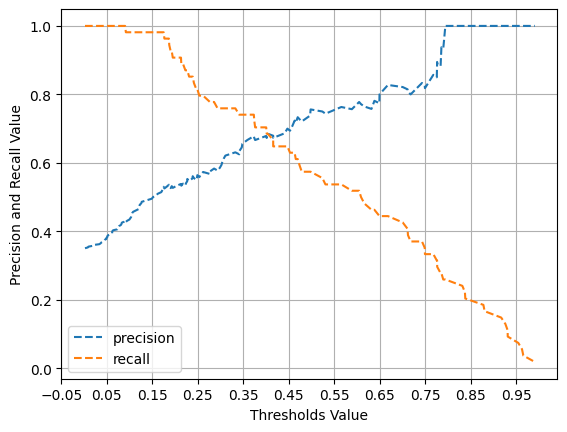

In [30]:
# 레이블 값이 1일 때의 예측 확률
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

precision_recall_curve_plot(y_test, pred_proba)

### (6) 예측 성능을 향상시키기 위해 데이터 가공 수행
- 0 값 확인하고 다른 값으로 대체
- 피처 스케일링 

In [31]:
diabetes_data.describe()

# min 값이 0인 피처가 어느 정도 존재하는 것을 확인
# Glucose(포도당), BloodPressure(혈압),SkinThickness(팔 뒤쪽 피하지방), Insulin,  BMI(체질량지수)
# 이런 피처들이 0이 날올 수 없는데 0으로 되어 있음
# ----> 전처리(가공) 작업 필요

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 각 피처들의 값 분포 확인

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

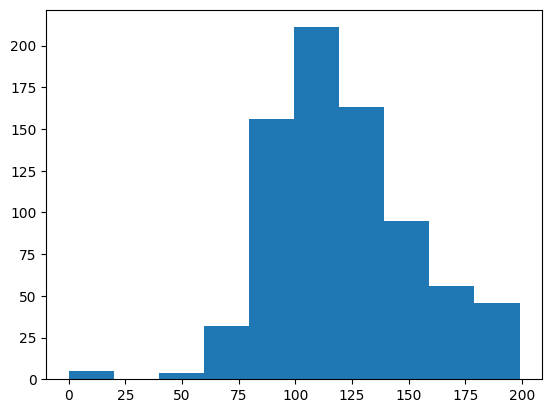

In [32]:
# Glucose(포도당) 피처의 히스토그램 확인
plt.hist(diabetes_data['Glucose'], bins=10)
# 0값이 일정 수준 존재 확인

### 0값이 있는 피처들에서 0값의 데이터 건수와 퍼센트 계산
- 0값의 데이터 건수  
- 전체 데이터 건수 대비 몇 퍼센트의 비율인지 확인  

In [35]:
# 0값을 검사할 피처명 리스트 생성
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터건수
total_count = diabetes_data['Glucose'].count()
total_count

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0건수는 {1}, 퍼센트 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))


# 0 값이 상당히 많음
# 전체 데이터 건수가 많지 않기 때문에
# 0값인 데이터를 삭제할 경우에
# 학습을 효과적으로 수행하기 어려울 것 같으므로
# 0값을 평균값으로 대체

768

Glucose 0건수는 0, 퍼센트 0.00 %
BloodPressure 0건수는 0, 퍼센트 0.00 %
SkinThickness 0건수는 0, 퍼센트 0.00 %
Insulin 0건수는 0, 퍼센트 0.00 %
BMI 0건수는 0, 퍼센트 0.00 %


**0값을 평균값으로 대체**

In [34]:
# 0값을 평균 값으로 대체
diabetes_data[zero_features]=diabetes_data[zero_features
                                          ].replace(0, diabetes_data[zero_features].mean())

### 피처 스케일링 (feature scaling)
- 서로 다른 변수의 값 범위를 일정한 수준으로 맞춤
- StandardScaler 클래스의 fit_transform() 메소드 이용해서 
- 피처 데이터 세트에 일괄적으로 스케일링 적용하고  
- 0값을 평균으로 대체한 데이터 세트로 학습/예측 수행  
- 개별 피처를 평균이 0이고 분산이 1인 값으로 변환

### 피처 스케일링 후 다시 예측 프로세스 진행

In [36]:
from sklearn.preprocessing import StandardScaler

# 피처 데이터 
feature_data = diabetes_data.drop('Outcome', axis=1)

# 레이블 데이터 
labels = diabetes_data['Outcome']


# 표준 스케일링 적용
scaler = StandardScaler()
feature_data_scaled = scaler.fit_transform(feature_data)

# 학습/테스트 데이터 세트  분리
# 스케일링된 피처 데이터 세트 사용
X_train, X_test, y_train, y_test = train_test_split(feature_data_scaled,
                                                    labels,
                                                    test_size=0.2,                                                
                                                    random_state=11,
                                                    stratify=labels)

# 로지스틱 회귀로
# 모델 생성/학습/예측
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

# 모델 평가
# pred_proba 사용해서
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
# get_clf_eval() 호출
get_clf_eval(y_test, y_pred, pred_proba)

# 평가지표 출력
# 데이터 가공전보다 전반적으로 수치가 낮아졌고
# 

LogisticRegression(max_iter=3000)

오차행렬 :  [[88 12]
 [25 29]]
정확도: 0.7597, 정밀도: 0.7073,  재현율: 0.5370, F1 Score: 0.6105, ROC_AUC : 0.8461


In [ ]:
# 데이터 가공
# 0값을 평균값으로 대체
# 피처 스케일링 수행 하기 전 성능평가지표
# 오차행렬 :  [[90 10]
#            [24 30]]
# 정확도: 0.7792, 정밀도: 0.7500,  재현율: 0.5556, F1 Score: 0.6383, ROC_AUC : 0.8513

### 임계값을 변화시키면서 재현율 성능 측정
- 임계값을 0.3에서 0.5까지 0.03씩 변화시키면서
- 재현율과 다른 평가 지표의 값 확인

Binarizer 클래스 활용
사이킷런의 Binarizer 클래스 이용해서  
분류 결정 임계값을 조절하여  
정밀도와 재현율의 성능 수치를 상호 보완적으로 조정 가능

Binarizer 클래스 이용 예측값 변환 예제
- 임계값(threshold) 변수를 특정 값으로 설정하고
- Binarizer 클래스의 fit_transform() 메서드를 이용해서
- 넘파이 ndarray 입력 값을 지정 threshold 보다 같거나 작으면 0값으로,
- 크면 1값으로 변환해서 반환Binarizer 클래스 이용 예측값 변환 예제
- 임계값(threshold) 변수를 특정 값으로 설정하고
- Binarizer 클래스의 fit_transform() 메서드를 이용해서
- 넘파이 ndarray 입력 값을 지정 threshold 보다 같거나 작으면 0값으로,
- 크면 1값으로 변환해서 반환

In [37]:
# 임계값에 따른 평가 수치 출력 함수
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba, thresholds):
    # thresholds 리스트 값을 차례로 반복하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)
        # threshold 보다 같거나 작으면 0, 크면 1로 변환해서 반환
        custom_predict = binarizer.transform(pred_proba)
        
        print('\n임계값 : ', custom_threshold)
        
        # 위에서 만든 평가 함수 호출
        get_clf_eval(y_test, custom_predict, pred_proba)

In [38]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45,0.48, 0.5]
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_eval_by_threshold(y_test, pred_proba.reshape(-1,1), thresholds)

# reshape(-1,1)에서 -1의 의미
# 열의 값은 특정 정수로 지정되어 있을 때
# 남은 배열의 길이와 남은 차원으로부터 추정해서
# 알아서 행을  지정하라는 의미

# 정확도와 정밀도를 희생하고 재현율을 높이는데 가장 좋은 임계값은 0.3으로 보임
# 재현율 : 0.7593
# 정밀도도 0.6212 정도는 많이  낮지 않다고 판단해서 이 임계값을 선택할 수 있음
# 만일 정밀도 수치가 더 많이 낮다면 다른 선택을 해야 함 
# 또한 F1 스코어가 0.6833으로 가장 높음 : 정밀도와 재현율이 균형을 이루고 있다고 보여짐 


임계값 :  0.3
오차행렬 :  [[75 25]
 [13 41]]
정확도: 0.7532, 정밀도: 0.6212,  재현율: 0.7593, F1 Score: 0.6833, ROC_AUC : 0.8461

임계값 :  0.33
오차행렬 :  [[77 23]
 [15 39]]
정확도: 0.7532, 정밀도: 0.6290,  재현율: 0.7222, F1 Score: 0.6724, ROC_AUC : 0.8461

임계값 :  0.36
오차행렬 :  [[79 21]
 [16 38]]
정확도: 0.7597, 정밀도: 0.6441,  재현율: 0.7037, F1 Score: 0.6726, ROC_AUC : 0.8461

임계값 :  0.39
오차행렬 :  [[81 19]
 [17 37]]
정확도: 0.7662, 정밀도: 0.6607,  재현율: 0.6852, F1 Score: 0.6727, ROC_AUC : 0.8461

임계값 :  0.42
오차행렬 :  [[84 16]
 [19 35]]
정확도: 0.7727, 정밀도: 0.6863,  재현율: 0.6481, F1 Score: 0.6667, ROC_AUC : 0.8461

임계값 :  0.45
오차행렬 :  [[86 14]
 [19 35]]
정확도: 0.7857, 정밀도: 0.7143,  재현율: 0.6481, F1 Score: 0.6796, ROC_AUC : 0.8461

임계값 :  0.48
오차행렬 :  [[87 13]
 [24 30]]
정확도: 0.7597, 정밀도: 0.6977,  재현율: 0.5556, F1 Score: 0.6186, ROC_AUC : 0.8461

임계값 :  0.5
오차행렬 :  [[88 12]
 [25 29]]
정확도: 0.7597, 정밀도: 0.7073,  재현율: 0.5370, F1 Score: 0.6105, ROC_AUC : 0.8461


In [39]:
lr_clf.predict_proba(X_test)[:, 1]

array([0.99444024, 0.16024478, 0.80380298, 0.792367  , 0.03982618,
       0.52247632, 0.04425754, 0.92908034, 0.85061868, 0.68132797,
       0.03339697, 0.80039946, 0.32320464, 0.25441518, 0.22225795,
       0.81979791, 0.76081831, 0.89579055, 0.44953591, 0.37312721,
       0.08422004, 0.01241444, 0.34076835, 0.18644551, 0.23041407,
       0.22403132, 0.48195188, 0.19331687, 0.27739601, 0.068702  ,
       0.41854702, 0.81657785, 0.09570861, 0.29350802, 0.65204945,
       0.47211704, 0.25546373, 0.43317833, 0.02794601, 0.04335974,
       0.07548422, 0.45176905, 0.83795559, 0.24581658, 0.24767427,
       0.80400841, 0.07735071, 0.50115774, 0.08047413, 0.10785696,
       0.0617696 , 0.11713441, 0.12696228, 0.17079562, 0.03604824,
       0.22195157, 0.13737693, 0.10702922, 0.75944456, 0.04185289,
       0.39597495, 0.46036716, 0.03060092, 0.9274826 , 0.05442859,
       0.16702648, 0.09948941, 0.09508402, 0.3292328 , 0.12588279,
       0.38881249, 0.1868754 , 0.31657823, 0.95189142, 0.07053

In [40]:
lr_clf.predict_proba(X_test)[:, 1].reshape(-1, 1)

array([[0.99444024],
       [0.16024478],
       [0.80380298],
       [0.792367  ],
       [0.03982618],
       [0.52247632],
       [0.04425754],
       [0.92908034],
       [0.85061868],
       [0.68132797],
       [0.03339697],
       [0.80039946],
       [0.32320464],
       [0.25441518],
       [0.22225795],
       [0.81979791],
       [0.76081831],
       [0.89579055],
       [0.44953591],
       [0.37312721],
       [0.08422004],
       [0.01241444],
       [0.34076835],
       [0.18644551],
       [0.23041407],
       [0.22403132],
       [0.48195188],
       [0.19331687],
       [0.27739601],
       [0.068702  ],
       [0.41854702],
       [0.81657785],
       [0.09570861],
       [0.29350802],
       [0.65204945],
       [0.47211704],
       [0.25546373],
       [0.43317833],
       [0.02794601],
       [0.04335974],
       [0.07548422],
       [0.45176905],
       [0.83795559],
       [0.24581658],
       [0.24767427],
       [0.80400841],
       [0.07735071],
       [0.501